In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [15]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [16]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [17]:
# Checking wether is missing values are not
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
df1 = df
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [19]:
car_names = df1.Car_Name.unique().tolist()
car_names = list(dict.fromkeys(car_names))

In [20]:
new_list = []
bikes = ['KTM','Hyosung','Hero','Activa','Honda','TVS']
for i in car_names:
    name = i.split(' ')
    if len(name) < 3:
        if name[0] in bikes:
            c = 0
        else:
            new_list.append(i)
        
new_list


['ritz',
 'sx4',
 'ciaz',
 'wagon r',
 'swift',
 'vitara brezza',
 's cross',
 'alto 800',
 'ertiga',
 'dzire',
 'alto k10',
 'ignis',
 '800',
 'baleno',
 'omni',
 'fortuner',
 'innova',
 'corolla altis',
 'etios cross',
 'etios g',
 'etios liva',
 'corolla',
 'etios gd',
 'camry',
 'land cruiser',
 'i20',
 'grand i10',
 'i10',
 'eon',
 'xcent',
 'elantra',
 'creta',
 'verna',
 'city',
 'brio',
 'amaze',
 'jazz']

In [21]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [22]:
df1.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


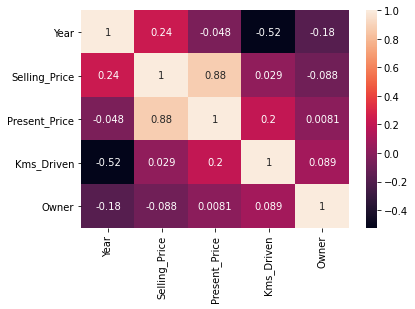

In [23]:
corr = df1.corr()
sns.heatmap(corr, annot=True)
plt.show()

<AxesSubplot:>

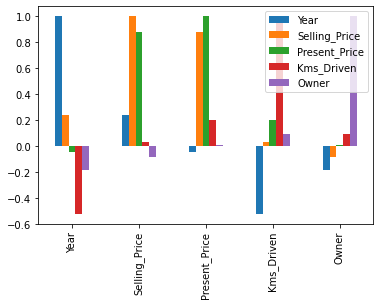

In [24]:
df1.corr().plot(kind = 'bar')

# here we will get to know the relationship between the each features in the dataset 
### kms_driven and year is the negatively corelated
### and seling_price and present_price are highly corelated

# based on this ill drop the columns

In [25]:
string_lst = df.dtypes[df.dtypes == 'object'].index.tolist()
string_lst

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [26]:
num_lst = df.dtypes[ ~ (df.dtypes == 'object')].index.tolist()
num_lst

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [27]:
df1.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [28]:
New_fule = pd.get_dummies(df1.Fuel_Type, prefix = 'New')
New_fule

,New_CNG,New_Diesel,New_Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [29]:
New_Seller = pd.get_dummies(df1.Seller_Type, prefix="New")
New_Seller.head()

,New_Dealer,New_Individual
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
New_Transmission = pd.get_dummies(df1.Transmission, prefix = 'New')
New_Transmission

,New_Automatic,New_Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
296,0,1
297,0,1
298,0,1
299,0,1


In [31]:
pd.concat([df1, New_fule, New_Seller, New_Transmission],axis = 1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,New_CNG,New_Diesel,New_Petrol,New_Dealer,New_Individual,New_Automatic,New_Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,0,1,0,1,0,0,1


In [32]:
cols = df1.columns.tolist()
cols

['Car_Name',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Owner']

In [33]:
cols = cols[:1] + cols[5:8] + cols[1:5] + cols[-1:]
cols

['Car_Name',
 'Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Year',
 'Selling_Price',
 'Present_Price',
 'Kms_Driven',
 'Owner']

In [34]:
df2 = df1[cols]
df2 = pd.concat([df2, New_fule, New_Seller, New_Transmission],axis = 1)
df2

,Car_Name,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner,New_CNG,New_Diesel,New_Petrol,New_Dealer,New_Individual,New_Automatic,New_Manual
0,ritz,Petrol,Dealer,Manual,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,Diesel,Dealer,Manual,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,Petrol,Dealer,Manual,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,Petrol,Dealer,Manual,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,Diesel,Dealer,Manual,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,Diesel,Dealer,Manual,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,brio,Petrol,Dealer,Manual,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,city,Petrol,Dealer,Manual,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,city,Diesel,Dealer,Manual,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [35]:
df2_new = df2.drop(columns=['Car_Name','Fuel_Type','Seller_Type','Transmission'], axis=1)
df2_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,New_CNG,New_Diesel,New_Petrol,New_Dealer,New_Individual,New_Automatic,New_Manual
0,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1


In [36]:
df2_new.shape

(301, 12)

In [37]:
df2_new.isna().sum()

Year              0
Selling_Price     0
Present_Price     0
Kms_Driven        0
Owner             0
New_CNG           0
New_Diesel        0
New_Petrol        0
New_Dealer        0
New_Individual    0
New_Automatic     0
New_Manual        0
dtype: int64

# Extract Train dataset and Test dataset¶
# 2. Separate out independent and target variables
## Year : independent variable [ X ]
## Selling_Price : Target variable [ y ]

In [60]:
X = df2_new.drop('Selling_Price', axis=1)
y = df2_new.loc[:, 'Selling_Price']

X.shape, y.shape

((301, 11), (301,))

### 3. Split the dataset into train and test with 25% data in test Can be easily established using sklearn

#### Usually go for 70-30 split

#### or 80-20

#### or 75-25

In [61]:
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      X, 
                                                      y, 
                                                      test_size=0.30, 
                                                      random_state=1234
                                                   )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((210, 11), (210,), (91, 11), (91,))

## Creating Linear Regression Model

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [106]:
y_learnt = lr_model.predict(X_train)

In [107]:
y_pred = lr_model.predict(X_test)

In [108]:
y_pred[:5]

array([3.5456231 , 0.13969245, 2.3018116 , 3.52067107, 1.74103223])

## Calculate RMSE

1. Let's first do it for the information learnt from the train data

In [109]:
from sklearn.metrics import mean_squared_error as mse

In [110]:
rmse = lambda actual,pred : np.sqrt(mse(actual, pred))

In [111]:
rmse_train = rmse(y_train, y_learnt)
rmse_test  = rmse(y_test, y_pred)

rmse_train, rmse_test

(1.6576461410668557, 1.9711195797186176)

In [112]:
from sklearn.metrics import r2_score

In [113]:
r2_score = r2_score(y_test, y_pred)
r2_score.round(4)

0.8587

### Adjusted r2 formula
### r2_adjusted = 1 - ( ( 1 - r2 ) * ( n - 1 ) / n - p - 1 )

### Here we all know that is when r2_score will decrease the adjusted r2 will also decrese
### r2 adjusted is mesure in between 0 to 1
### so r2_adjusted is near to 1 the model will become good
### so r2_adjusted is near to 0 the model will become bad
### Example : 

In [114]:
r2_score = r2_score.round(4)
r2_score

0.8587

In [115]:
num_of_predicters = len(y_pred)
num_of_predicters

91

In [116]:
Total_sample_size = len(y_learnt)
Total_sample_size

210

In [117]:
r2_adjusted = 1 - ((1 - r2_score)*(Total_sample_size - 1)/(Total_sample_size - num_of_predicters - 1))
r2_adjusted

0.7497313559322034